In [1]:
import numpy as np 
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,recall_score,ConfusionMatrixDisplay

In [7]:
labelencoder = LabelEncoder()
df['species'] = labelencoder.fit_transform(df['species'])    

In [8]:
x = df.drop(columns=['species'])
y = df['species']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [10]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [11]:
predicted = model.predict(x_test)
predicted

array([2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0,
       1, 1, 0, 0, 2, 1, 0, 0])

In [14]:
precision_score(y_test, predicted, average='macro')

0.9722222222222222

In [13]:
recall_score(y_test, predicted, average='macro')

0.9696969696969697

In [15]:
accuracy_score(y_test, predicted)

0.9666666666666667

In [16]:
cm = confusion_matrix(y_test, predicted)
cm

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 10]], dtype=int64)

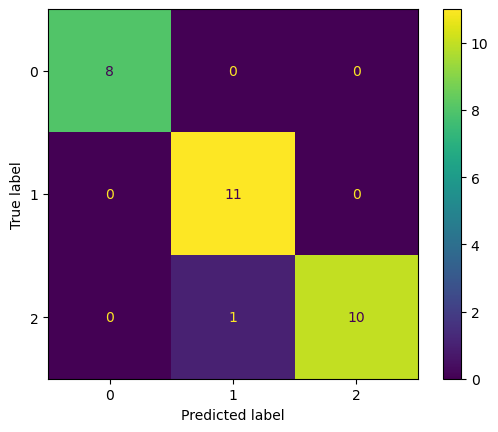

In [17]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()